In [ ]:
# Cargar liberías para ordenar y vizualizar datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Descargar grupo de datos de la fuente original
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00597/garments_worker_productivity.csv

--2021-06-25 19:58:05--  https://archive.ics.uci.edu/ml/machine-learning-databases/00597/garments_worker_productivity.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 94933 (93K) [application/x-httpd-php]
Saving to: ‘garments_worker_productivity.csv’

garments_worker_pro 100%[===================>]  92.71K  --.-KB/s    in 0.03s   

2021-06-25 19:58:05 (2.80 MB/s) - ‘garments_worker_productivity.csv’ saved [94933/94933]



In [ ]:
%ls

garments_worker_productivity.csv  sample_data/


In [ ]:
#Lectura del grupo de datos CSV
file_name = "garments_worker_productivity.csv"

#El método "read_csv" nos permite leer un excel
dataset = pd.read_csv(file_name)

In [ ]:
#Tamaño del dataset (registros, variables). En la nomenclatura de pandas es (axis 0, axis 1)
dataset.shape

(1197, 15)

In [ ]:
#Vemos los primeros registros del dataset
dataset.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [ ]:
# Datos estadísticos de datos
dataset.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


In [ ]:
#Porcentaje de filas (registros) únicas
dataset.nunique() / len(dataset)

date                     0.049290
quarter                  0.004177
department               0.002506
day                      0.005013
team                     0.010025
targeted_productivity    0.007519
smv                      0.058480
wip                      0.457811
over_time                0.119465
incentive                0.040100
idle_time                0.010025
idle_men                 0.008354
no_of_style_change       0.002506
no_of_workers            0.050961
actual_productivity      0.734336
dtype: float64

In [ ]:
#Porcentaje de filas (registros) vacías ...
dataset.isna().sum() / len(dataset)

date                     0.000000
quarter                  0.000000
department               0.000000
day                      0.000000
team                     0.000000
targeted_productivity    0.000000
smv                      0.000000
wip                      0.422723
over_time                0.000000
incentive                0.000000
idle_time                0.000000
idle_men                 0.000000
no_of_style_change       0.000000
no_of_workers            0.000000
actual_productivity      0.000000
dtype: float64

In [ ]:
#Tipos de datos
dataset.dtypes

date                      object
quarter                   object
department                object
day                       object
team                       int64
targeted_productivity    float64
smv                      float64
wip                      float64
over_time                  int64
incentive                  int64
idle_time                float64
idle_men                   int64
no_of_style_change         int64
no_of_workers            float64
actual_productivity      float64
dtype: object

In [ ]:
#Separamos la data, en variables independientes (x) y dependientes (y)
x = dataset.drop(["actual_productivity"], axis=1)
y = dataset["actual_productivity"]
print(x)
print(y)

           date   quarter  ... no_of_style_change no_of_workers
0      1/1/2015  Quarter1  ...                  0          59.0
1      1/1/2015  Quarter1  ...                  0           8.0
2      1/1/2015  Quarter1  ...                  0          30.5
3      1/1/2015  Quarter1  ...                  0          30.5
4      1/1/2015  Quarter1  ...                  0          56.0
...         ...       ...  ...                ...           ...
1192  3/11/2015  Quarter2  ...                  0           8.0
1193  3/11/2015  Quarter2  ...                  0           8.0
1194  3/11/2015  Quarter2  ...                  0           8.0
1195  3/11/2015  Quarter2  ...                  0          15.0
1196  3/11/2015  Quarter2  ...                  0           6.0

[1197 rows x 14 columns]
0       0.940725
1       0.886500
2       0.800570
3       0.800570
4       0.800382
          ...   
1192    0.628333
1193    0.625625
1194    0.625625
1195    0.505889
1196    0.394722
Name: actual_produc

In [ ]:
#Crear una matriz para representar el eje x de un gráfico
x1 = np.arange(0, len(y), 1)
x1

array([   0,    1,    2, ..., 1194, 1195, 1196])

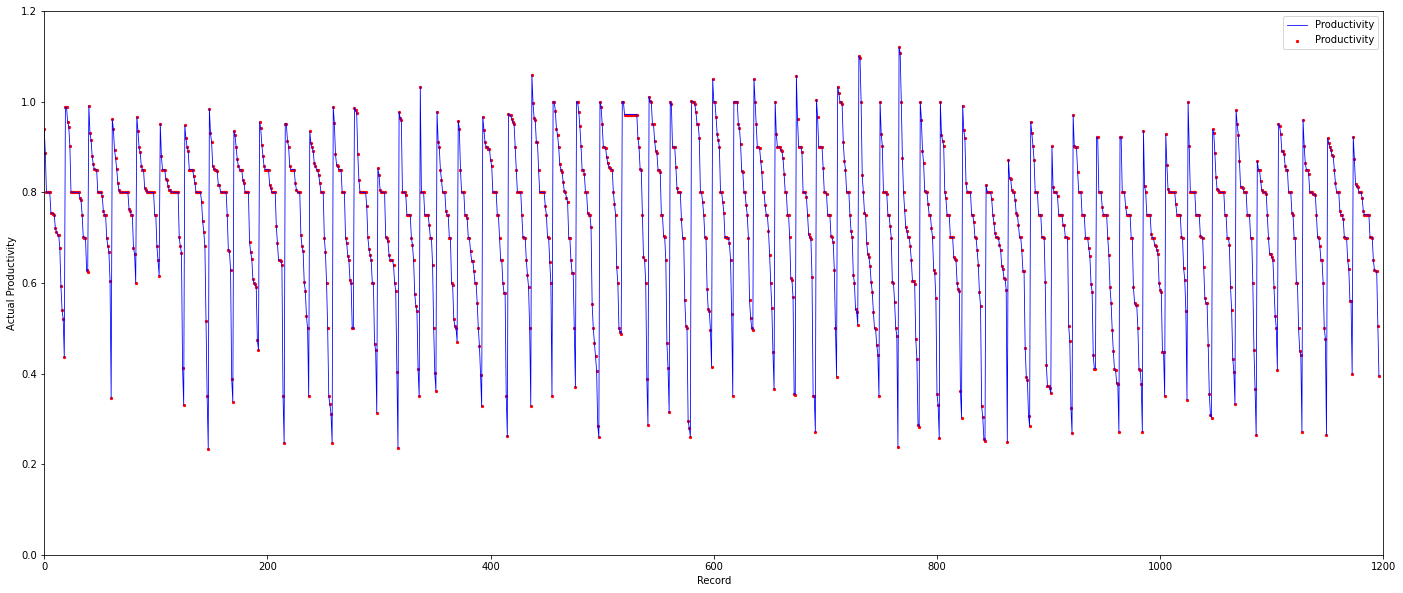

In [ ]:
# Mostrar la productividad (y) graficada en el tiempo o en el número de registro de menor a mayor
plt.figure(figsize=(24,10))
plt.scatter(x1, y, s=5, color="red", label="Productivity")
#plt.plot(x1, y, 'b-')
plt.plot(x1, y, lw=0.8, color="blue", label="Productivity")
plt.axis([0, 1200, 0, 1.2])
plt.xlabel('Record')
plt.ylabel('Actual Productivity')
plt.legend()
plt.show()
